In [2]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [7]:
# Pull unemployment data
unemployment_rate = fred.get_series('UNRATE', observation_start='2018-01-01')
unemployment_rate = unemployment_rate.dropna()
unemployment_rate.tail()

2021-11-01    4.2
2021-12-01    3.9
2022-01-01    4.0
2022-02-01    3.8
2022-03-01    3.6
dtype: float64

<AxesSubplot:title={'center':'US Unemployment Rate'}, xlabel='Date', ylabel='unemployment (%)'>

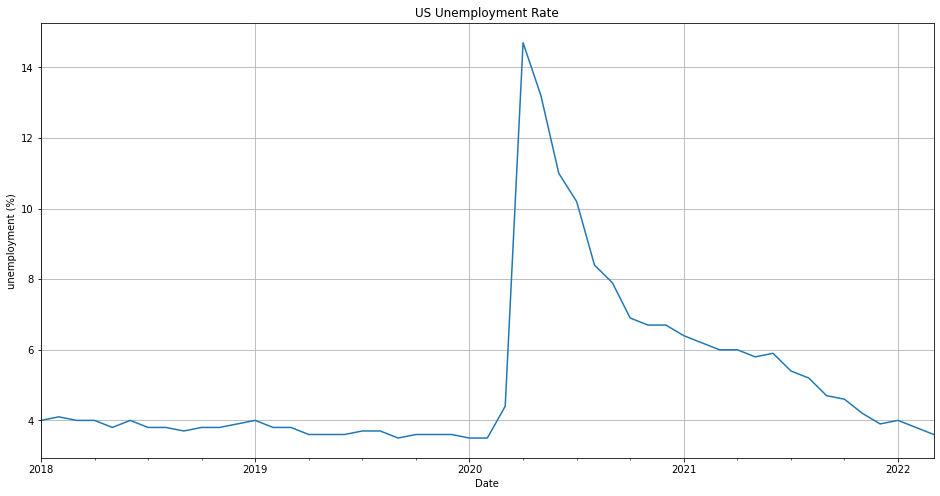

In [6]:
# Plot unemployment data
unemployment_rate.plot(figsize=(16,8), title='US Unemployment Rate', grid=True, xlabel='Date', ylabel='unemployment (%)')

In [11]:
# Pull S&P 500 historical data; set freq to monthly
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2022-03-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,4298.379883,4385.339844,4286.830078,4384.649902,4384.649902,3.941780e+09
2022-02-26,4298.379883,4385.339844,4286.830078,4384.649902,4384.649902,3.941780e+09
2022-02-27,4298.379883,4385.339844,4286.830078,4384.649902,4384.649902,3.941780e+09
2022-02-28,4354.169922,4388.839844,4315.120117,4373.939941,4373.939941,4.594010e+09
2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4.679400e+09


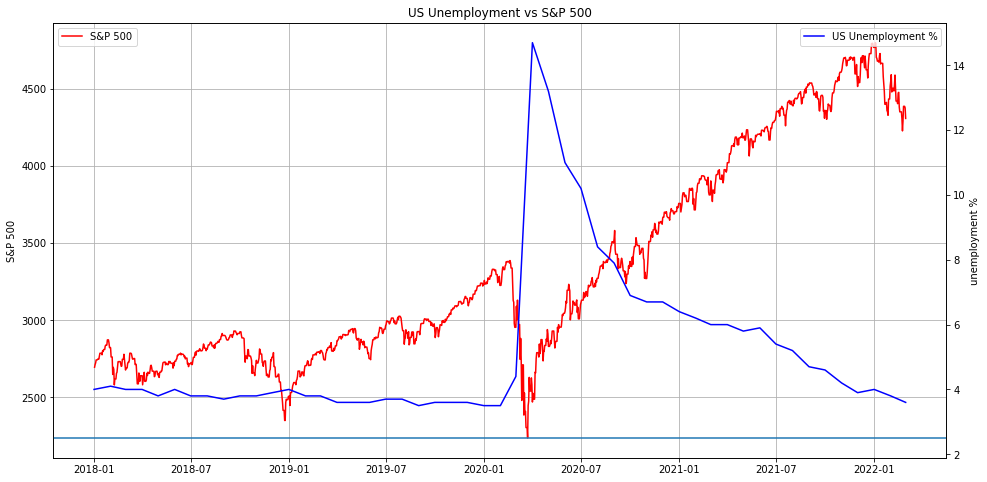

In [13]:
# Plot US unemployment against S&P 500 index
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(unemployment_rate, label='US Unemployment %', color='b')
ax.set_title('US Unemployment vs S&P 500')
ax2.set_ylabel('unemployment %')
ax2.axhline(y=2.5)
ax2.legend(loc='upper right')